# Summary of visual analysis
This notebook will read in the visual analysis of both some files on my computer with visual analysis and make graphs out of them

In [29]:
#Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from matplotlib.colors import ListedColormap

#Find the current directory
current_dir = os.getcwd()

#Load extra_functions.py in the current_dir
sys.path.append(current_dir)


In [45]:
#Read in the excel file results_df_types_1
results_df_types_1 = pd.read_excel('data/results_df_types_1.xlsx')
results_df_types_2= pd.read_excel('data/results_df_type_2.xlsx')


In [40]:
#print head
results_df_types_1.head()

,number,vx,vy,Still a galaxy?,Right level of diffuse?,Status,Dark matter,Candidate?,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,1000,-1000,-950,y,o,Candidate,Streaked,y,Status,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,-1000,-900,y,o,Candidate,Streaked,y,Can see elements of the tail,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,-1000,-850,y,y,Candidate,Streaked,y,Destroyed,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,-1000,-800,y,y,Candidate,Streaked,maybe,Candidate,Count of Still a galaxy?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,-1000,-750,y,y,Candidate,Streaked,maybe,NaN,Row Labels,...,-450.0,-400.0,-350.0,-300.0,-250.0,-200.0,-150.0,-100.0,-50.0,Grand Total


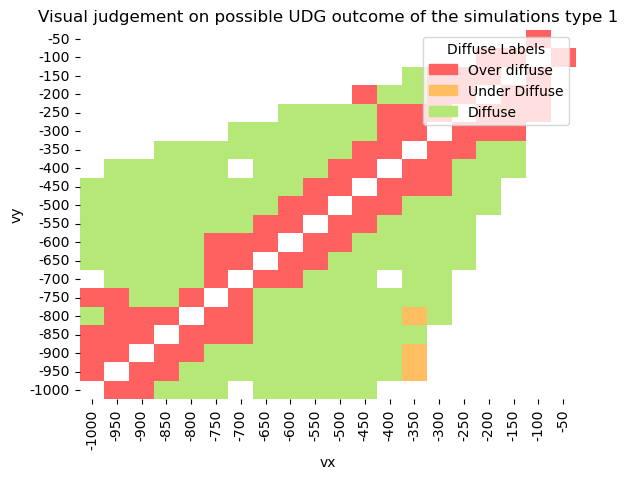

In [49]:

def plot_diffuse_heatmap(df, type):
    #Change any capitals in right level of diffuse to lowercase
    df['Right level of diffuse?'] = df['Right level of diffuse?'].str.lower()
    # Assign numeric codes to the values of 'Right level of diffuse?'
    df['key_diffuse'] = pd.Categorical(df['Right level of diffuse?'], 
                                       categories=['o', 'u', 'y'],
                                       ordered=True).codes

    # Create a pivot table with vx and vy as the x and y axes and 'key_diffuse' as the values
    pivot = df.pivot_table(index='vx', columns='vy', values='key_diffuse', aggfunc='first')

    # Create a colormap mapping numeric codes to colors
    cmap = ListedColormap(['#ff6161', '#ffbe61', '#b5e876'])  # Custom colors

    # Create heatmap
    sns.heatmap(pivot, cmap=cmap, cbar=False)

    # Add title and axis labels
    plt.title(f'Visual judgement on possible UDG outcome of the simulations {type}')
    plt.xlabel('vx')
    plt.ylabel('vy')

    # Create custom labels for the colors
    color_labels = ['Over diffuse', 'Under Diffuse', 'Diffuse']
    colors = [cmap(x) for x in range(cmap.N)]
    custom_labels = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(color_labels))]

    # Add the color labels to the plot
    plt.legend(custom_labels, color_labels, title='Diffuse Labels')

    # Invert y axis
    plt.gca().invert_yaxis()

    # Show plot
    plt.show()


plot_diffuse_heatmap(results_df_types_1, 'type 1')

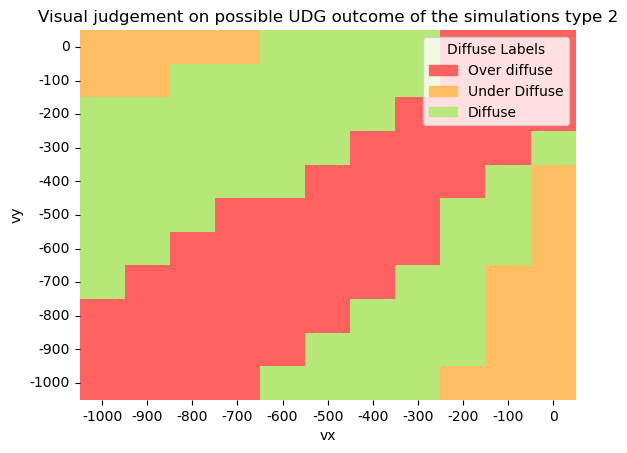

In [50]:
plot_diffuse_heatmap(results_df_types_2, 'type 2')